In [37]:
"""This code takes the weighted topics and makes visualizations"""
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle
import squarify
%matplotlib inline
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

In [38]:
df_media_ranks = pd.read_csv('trustmatrix.csv', header=0, index_col = 0)
df_media_ranks.head()

,trust,polarity,rank,cons_pol,lib_pol
paper,,,,,
wsj,4,1,3,1,-1
npr,5,4,1,-4,4
msnbc,1,1,0,-1,1
blaze,3,4,-1,4,-4
nyt,2,3,-1,-3,3


In [39]:
df_topics = pd.read_csv('topics-quantified_revised24.csv', header=0, index_col=0)
dftopics_code = pd.read_csv('topics_list_24_coded.csv', header=0)

#fill in missing papers
df_topics['paper'].fillna(method='ffill', inplace=True)

#find the average weight of each topic per paper
dfgrp=df_topics.groupby('paper').mean()
df_topics.head()

,incident parkland (1),incident mass shooting (1),guns ar 15,incident parkland (2),government trump,culture national identity,meta opinions,gun control national identity,meta meta,gun control bans,...,incident nyc,gun control background check,gun control second ammendment (2),gun control nra,guns assault weapons (2),guns sales,culture government,incident mass shooting (2),paper,aid
index,,,,,,,,,,,,,,,,,,,,,
0,0.042322,0.0,0.000000,0.015700,0.022909,0.171845,0.006615,0.058820,0.0,0.010476,...,0.000000,0.091198,0.007788,0.060155,0.0000,0.000000,0.000000,0.000000,wsj,wsj0
1,0.013435,0.0,0.000000,0.058396,0.020470,0.003034,0.003013,0.121036,0.0,0.013291,...,0.022429,0.000892,0.000000,0.007896,0.0168,0.234599,0.000000,0.000000,wsj,wsj1
2,0.000000,0.0,0.128812,0.075872,0.000000,0.000285,0.006531,0.035142,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.137781,0.000000,0.029078,wsj,wsj2
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.355963,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,wsj,wsj3
4,0.000000,0.0,0.000000,0.215865,0.000000,0.000966,0.000000,0.043644,0.0,0.000000,...,0.000000,0.011501,0.000000,0.000000,0.0000,0.023271,0.003242,0.040492,wsj,wsj4


In [74]:
dfto = df_topics.groupby('paper').sum()
dfto=dfto.T
dfto.head()

paper,blaze,breitbart,fox,huffpo,inforwars,msnbc,nation,npr,nyt,wsj
incident parkland (1),12.597862,8.005723,8.238921,7.460400,4.175639,10.990825,3.725856,12.156529,12.725314,9.625920
incident mass shooting (1),14.497622,5.615286,7.489659,7.577789,2.679541,10.301082,3.552726,11.802631,13.118649,8.230348
guns ar 15,15.909344,7.391072,10.381416,7.078689,3.021003,11.068733,4.177419,12.084314,13.201300,8.886702
incident parkland (2),12.147129,8.927578,9.246586,6.723713,4.428666,10.994096,5.251643,11.121231,10.045074,11.746653
government trump,3.856240,6.263347,15.218395,11.059816,1.220634,4.147346,1.913616,3.963335,15.884180,4.306690


In [68]:
dftopics_code.head()
dftopics_code['genspec']

,topicID,words10,words2,general,specific,genspec
0,0,shooting mass people florida parkland left dea...,shooting mass,incident,parkland,incident parkland (1)
1,1,officer police department incident county city...,officer police,incident,mass shooting,incident mass shooting (1)
2,2,ar 15 semi used store buy automatic rifle ammu...,ar 15,guns,ar 15,guns ar 15
3,3,school student high parkland florida medium ch...,school student,incident,parkland,incident parkland (2)
4,4,trump president white house read morning repub...,trump president,government,trump,government trump


In [41]:
#find the biggest topic for each paper
maxes=dfgrp.idxmax(axis=1)
#transpose that df
dft=dfgrp.T
dft['topicID']=list(range(0,24))


#join the topics to the dataframe
df=pd.merge(dft, dftopics_code, how='inner',on='topicID')
df.drop(['topicID'], axis=1, inplace=True)

In [42]:
outfile=open('alltopics-weights24.csv', 'w')
df.to_csv(outfile)

In [43]:
#average for each topic across all newspapers 
df['avg']=df.mean(axis=1)

In [44]:
df_ranked = df[['wsj', 'npr', 'msnbc', 'blaze',  'nyt', 'fox', 'breitbart', 'huffpo', 'nation', 'inforwars']].T
df_ranked = df_ranked.join(df_media_ranks)
df_ranked

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,trust,polarity,rank,cons_pol,lib_pol
wsj,0.018764,0.016044,0.017323,0.022898,0.008395,0.020229,0.024128,0.029344,0.014253,0.017492,...,0.012116,0.020465,0.015175,0.013747,0.020263,4,1,3,1,-1
npr,0.022512,0.021857,0.022378,0.020595,0.007340,0.013613,0.034797,0.033921,0.013282,0.013238,...,0.012887,0.021182,0.012306,0.011504,0.020529,5,4,1,-4,4
msnbc,0.019911,0.018661,0.020052,0.019917,0.007513,0.019621,0.020952,0.031085,0.018319,0.015013,...,0.014759,0.021094,0.013047,0.013363,0.020183,1,1,0,-1,1
blaze,0.022218,0.025569,0.028059,0.021424,0.006801,0.011692,0.026843,0.035847,0.018374,0.015021,...,0.013171,0.020104,0.013294,0.014824,0.024009,3,4,-1,4,-4
nyt,0.023306,0.024027,0.024178,0.018398,0.029092,0.013771,0.025385,0.035803,0.018060,0.013191,...,0.012557,0.019564,0.010672,0.014895,0.021344,2,3,-1,-3,3
fox,0.019431,0.017664,0.024484,0.021808,0.035892,0.014968,0.021681,0.039057,0.021365,0.013552,...,0.014799,0.018359,0.014151,0.016605,0.022199,-1,2,-3,2,-2
breitbart,0.024408,0.017120,0.022534,0.027218,0.019096,0.011562,0.034413,0.041169,0.015234,0.014985,...,0.015165,0.019482,0.016441,0.010815,0.024478,-2,3,-5,3,-3
huffpo,0.020163,0.020481,0.019132,0.018172,0.029891,0.021108,0.029418,0.036714,0.015330,0.010747,...,0.015865,0.022771,0.009002,0.011559,0.014238,-3,2,-5,-2,2
nation,0.017913,0.017080,0.020084,0.025248,0.009200,0.022068,0.023379,0.029143,0.014813,0.017070,...,0.012166,0.018328,0.016211,0.017134,0.020105,-4,5,-9,-5,5
inforwars,0.022330,0.014329,0.016155,0.023683,0.006527,0.013626,0.046434,0.037179,0.010291,0.017366,...,0.014101,0.019669,0.019801,0.011778,0.022723,-5,5,-10,5,-5


In [45]:
mydict={}
n=0
with open('topickey.csv', 'r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        mydict[n] = row[1]
        n+=1
df_ranked.rename(columns=mydict, inplace=True)
#col_names = list(df_ranked.dtypes.index)[:24]
col_names = sorted(list(dftopics_code['genspec']))
df_ranked.columns = list(dftopics_code['genspec'])+['trust', 'polarity' ,'rank' ,'cons_pol' ,'lib_pol']
#uncomment to make ranking graphs go from high rank to low rank
#df_ranked['rank']=df_ranked['rank'].apply(lambda x: x*-1)
df_ranked

,incident parkland (1),incident mass shooting (1),guns ar 15,incident parkland (2),government trump,culture national identity,meta opinions,gun control national identity,meta meta,gun control bans,...,gun control nra,guns assault weapons (2),guns sales,culture government,incident mass shooting (2),trust,polarity,rank,cons_pol,lib_pol
wsj,0.018764,0.016044,0.017323,0.022898,0.008395,0.020229,0.024128,0.029344,0.014253,0.017492,...,0.012116,0.020465,0.015175,0.013747,0.020263,4,1,3,1,-1
npr,0.022512,0.021857,0.022378,0.020595,0.007340,0.013613,0.034797,0.033921,0.013282,0.013238,...,0.012887,0.021182,0.012306,0.011504,0.020529,5,4,1,-4,4
msnbc,0.019911,0.018661,0.020052,0.019917,0.007513,0.019621,0.020952,0.031085,0.018319,0.015013,...,0.014759,0.021094,0.013047,0.013363,0.020183,1,1,0,-1,1
blaze,0.022218,0.025569,0.028059,0.021424,0.006801,0.011692,0.026843,0.035847,0.018374,0.015021,...,0.013171,0.020104,0.013294,0.014824,0.024009,3,4,-1,4,-4
nyt,0.023306,0.024027,0.024178,0.018398,0.029092,0.013771,0.025385,0.035803,0.018060,0.013191,...,0.012557,0.019564,0.010672,0.014895,0.021344,2,3,-1,-3,3
fox,0.019431,0.017664,0.024484,0.021808,0.035892,0.014968,0.021681,0.039057,0.021365,0.013552,...,0.014799,0.018359,0.014151,0.016605,0.022199,-1,2,-3,2,-2
breitbart,0.024408,0.017120,0.022534,0.027218,0.019096,0.011562,0.034413,0.041169,0.015234,0.014985,...,0.015165,0.019482,0.016441,0.010815,0.024478,-2,3,-5,3,-3
huffpo,0.020163,0.020481,0.019132,0.018172,0.029891,0.021108,0.029418,0.036714,0.015330,0.010747,...,0.015865,0.022771,0.009002,0.011559,0.014238,-3,2,-5,-2,2
nation,0.017913,0.017080,0.020084,0.025248,0.009200,0.022068,0.023379,0.029143,0.014813,0.017070,...,0.012166,0.018328,0.016211,0.017134,0.020105,-4,5,-9,-5,5
inforwars,0.022330,0.014329,0.016155,0.023683,0.006527,0.013626,0.046434,0.037179,0.010291,0.017366,...,0.014101,0.019669,0.019801,0.011778,0.022723,-5,5,-10,5,-5


In [46]:
# Data manipulation:

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments
def colorline(x, y, color, z=None, norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    cmap=plt.get_cmap(color)
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


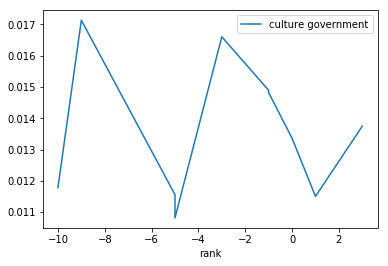

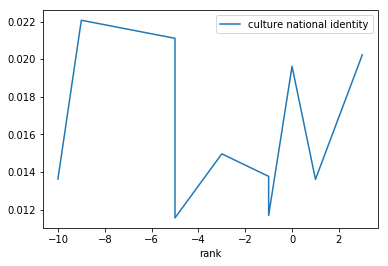

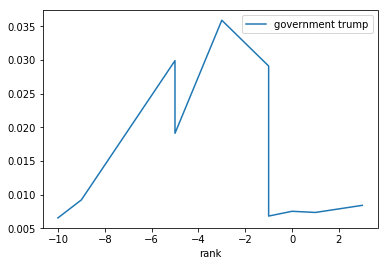

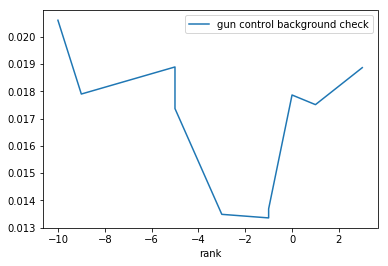

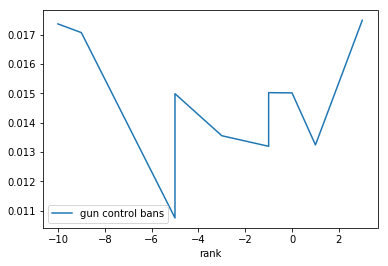

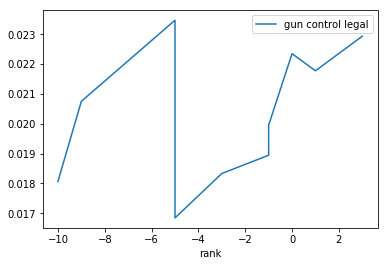

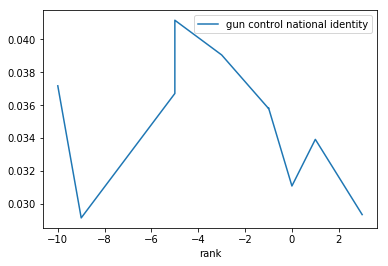

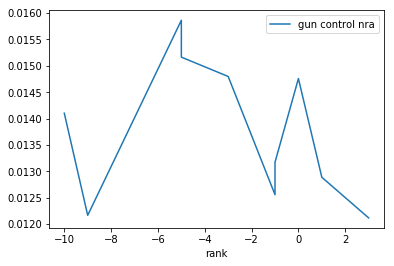

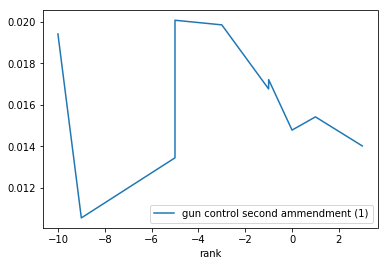

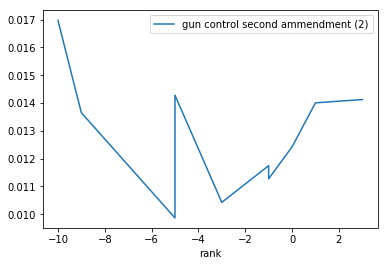

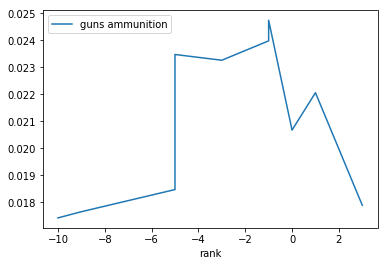

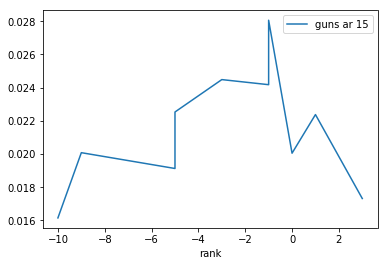

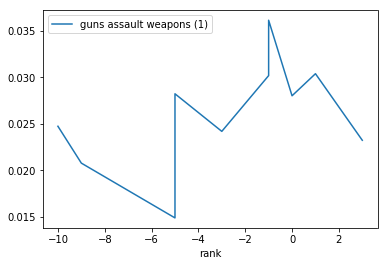

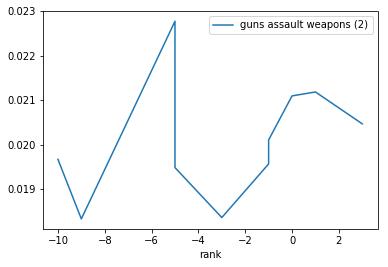

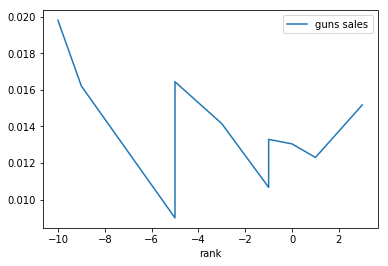

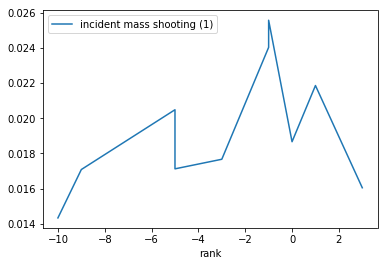

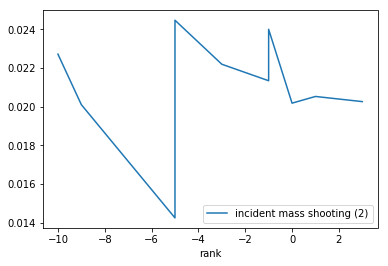

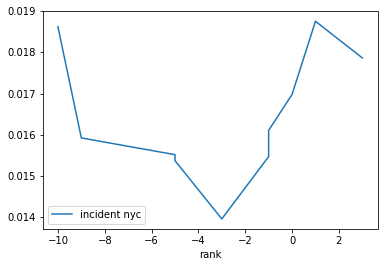

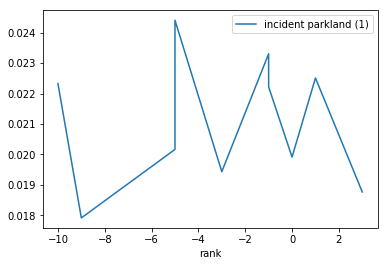

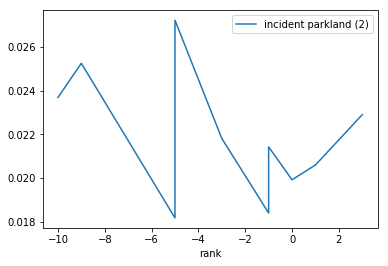

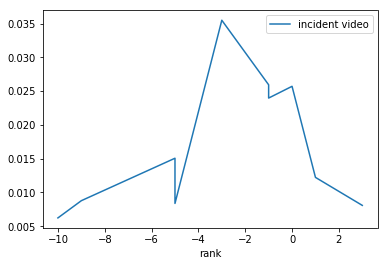

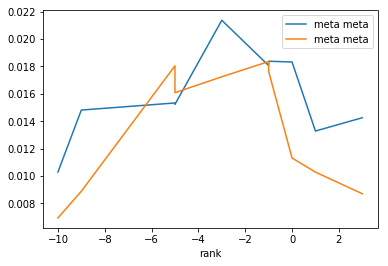

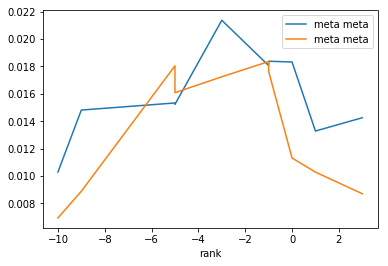

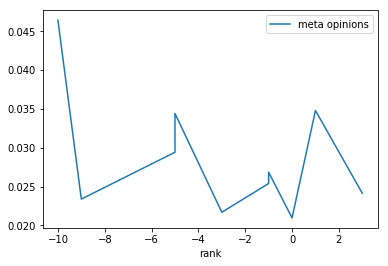

In [47]:
for col in col_names:
    df_ranked.plot(x = 'rank', y = col)

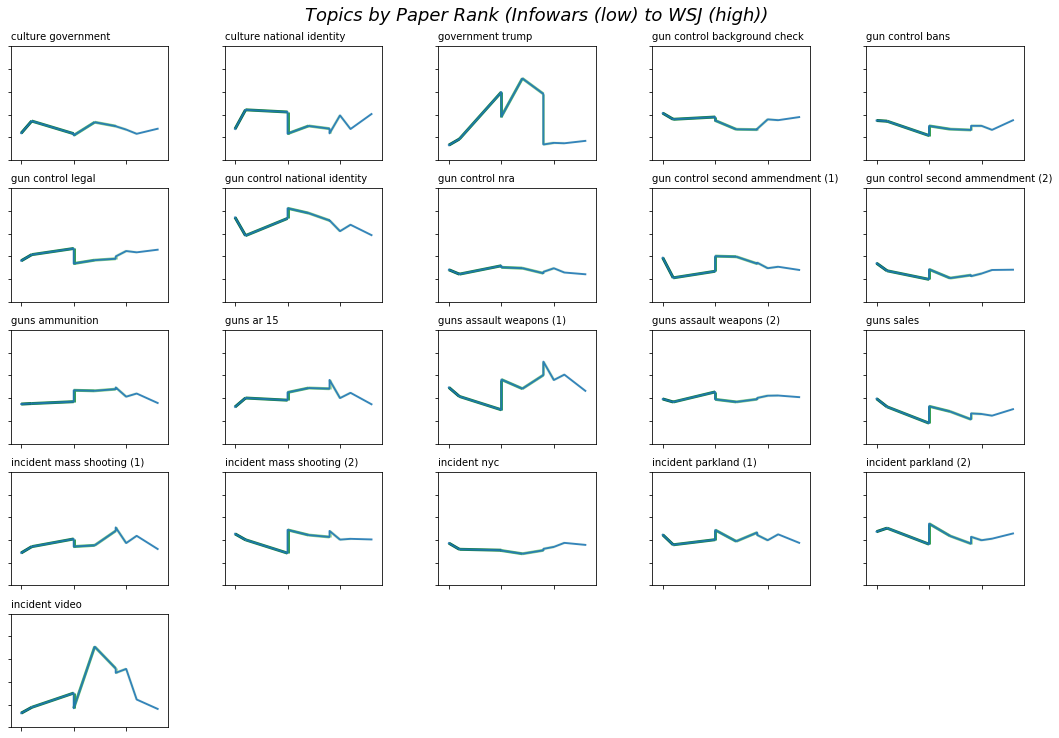

In [65]:
plt.figure(figsize=(15,10))
num = 0
for col in col_names:
    if 'meta' not in col:
        num+=1
        plt.subplot(5,5, num)

        plt.plot(df_ranked['rank'], df_ranked[col], marker='', linewidth=1.9, alpha=0.9, label=col)
        colorline(df_ranked['rank'], df_ranked[col], 'Greens')
        plt.xlim(-11, 4)
        plt.ylim(0, .05)
        plt.tick_params(labelbottom='off')
        plt.tick_params(labelleft='off')
        plt.title(col, loc='left', fontsize=10, fontweight=0 )
    else:
        pass

plt.tight_layout()
plt.suptitle("Topics by Paper Rank (Infowars (low) to WSJ (high))", fontsize=18, fontweight=0, color='black', style='italic', y=1.02)
plt.savefig('rank-all.svg', dpi=1000)
plt.savefig('rank-all.png', transparent=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


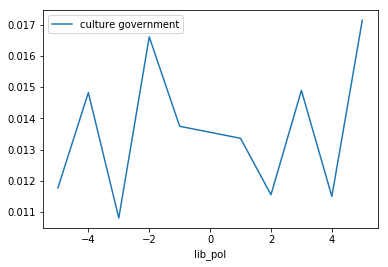

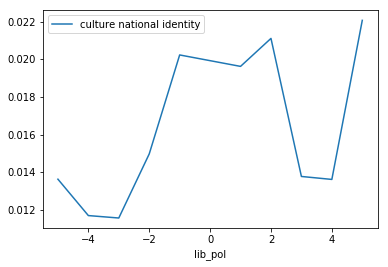

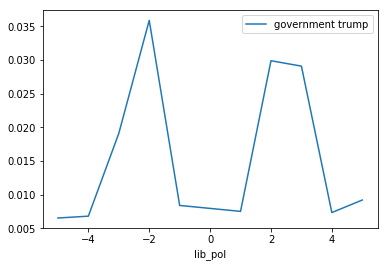

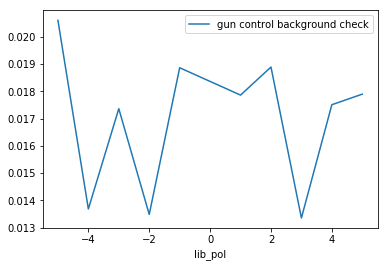

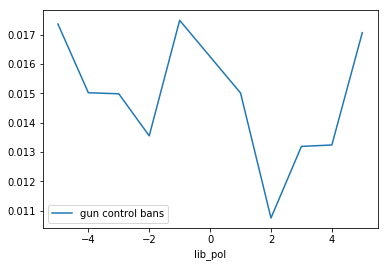

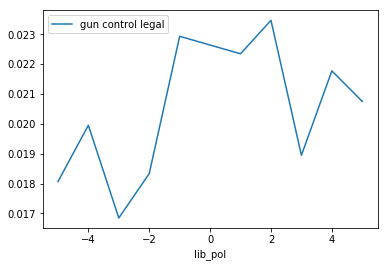

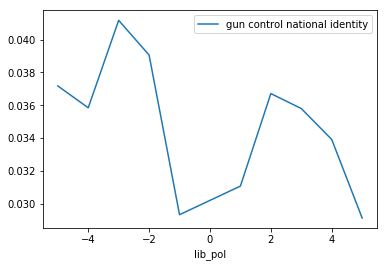

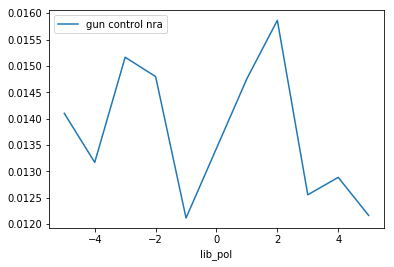

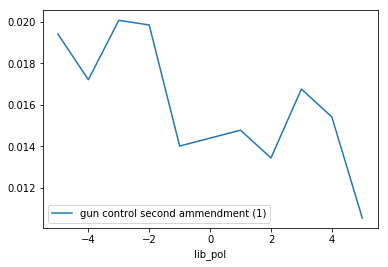

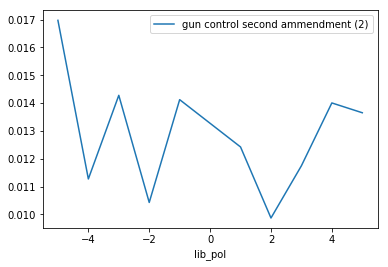

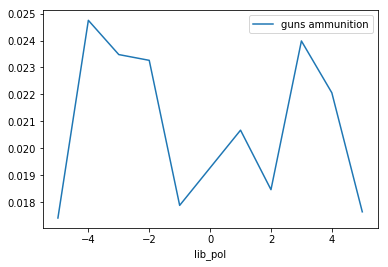

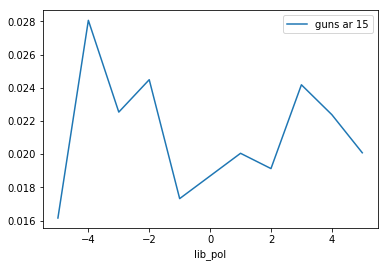

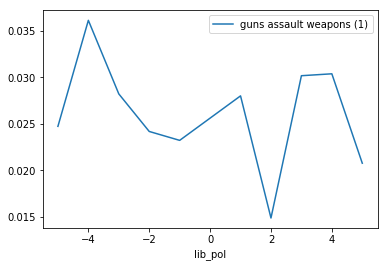

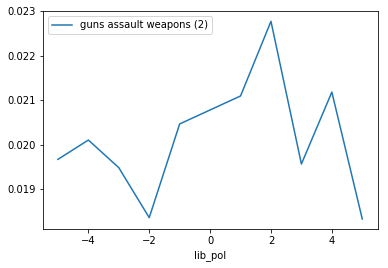

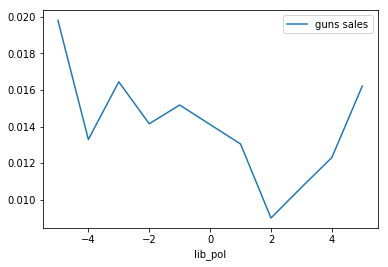

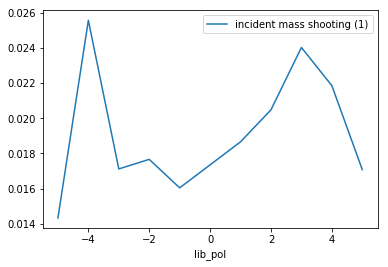

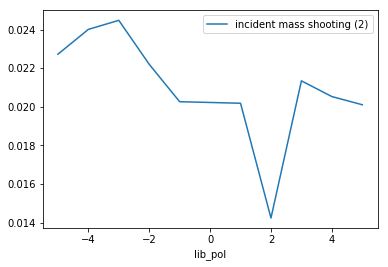

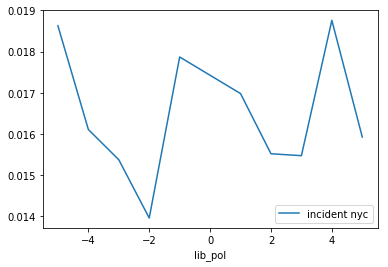

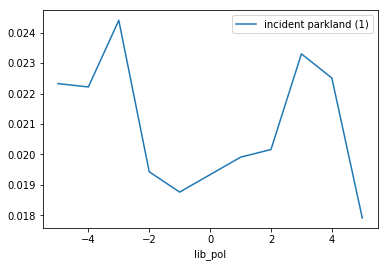

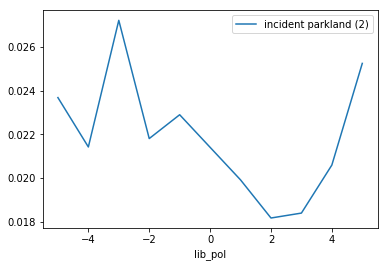

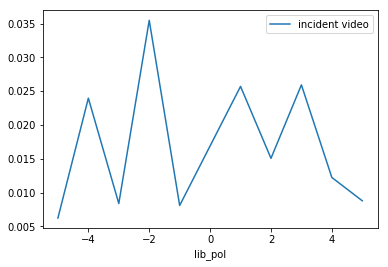

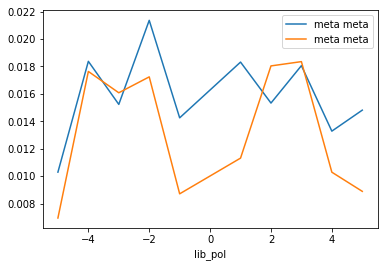

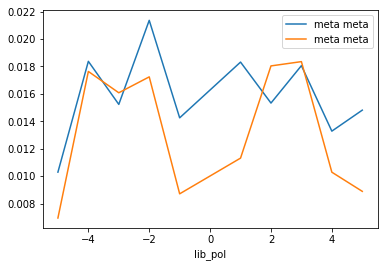

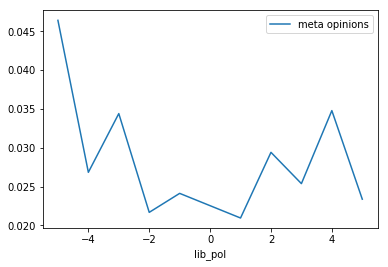

In [49]:
df_lib_sort = df_ranked.sort_values('lib_pol')
for col in col_names:
    df_lib_sort.plot(x = 'lib_pol', y = col)

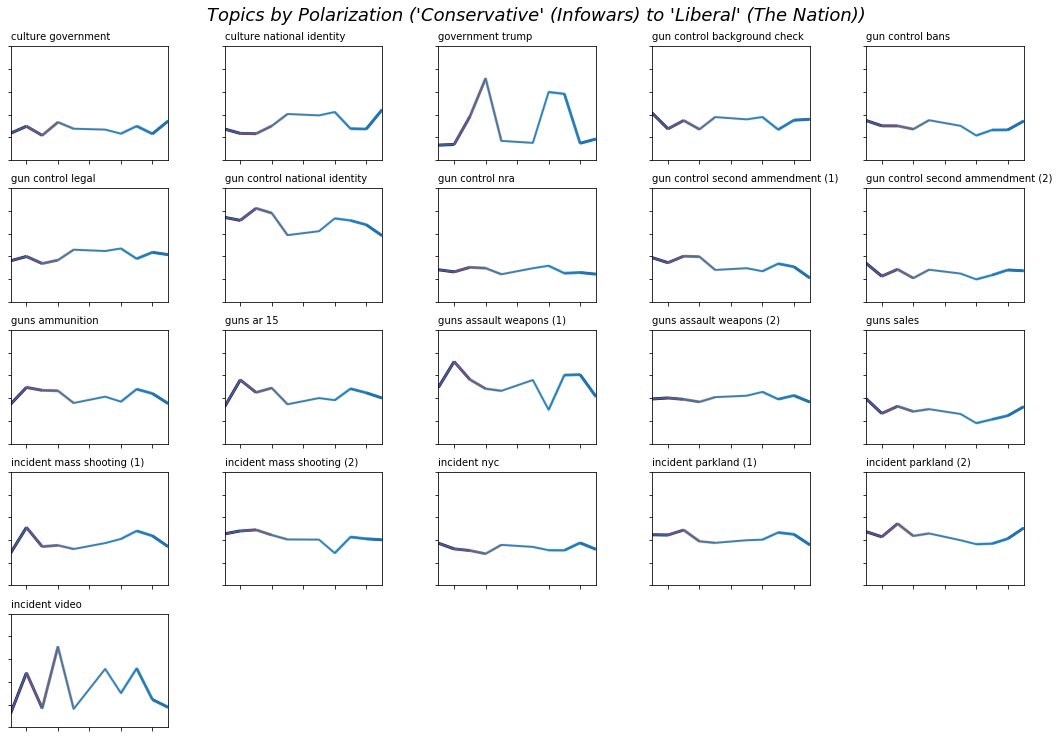

In [50]:
#plt.style.use('seaborn')
plt.figure(figsize=(15,10))
num = 0
for col in col_names:
    if 'meta' not in col:
        num+=1
        plt.subplot(5,5, num)
        
        plt.plot(df_lib_sort['lib_pol'], df_lib_sort[col], marker='', linewidth=1.9, alpha=0.9, label=col)
        colorline(df_lib_sort['lib_pol'], df_lib_sort[col], 'RdBu')
        plt.xlim(-5, 5)
        plt.ylim(0, .05)
        plt.tick_params(labelbottom='off')
        plt.tick_params(labelleft='off')
        plt.title(col, loc='left', fontsize=10, fontweight=0 )
    else:
        pass

plt.tight_layout()    
plt.suptitle("Topics by Polarization ('Conservative' (Infowars) to 'Liberal' (The Nation))", fontsize=18, fontweight=0, color='black', style='italic', y=1.02)
plt.savefig('cons-to-lib-all.svg', dpi=1000)
plt.savefig('cons-to-lib-all.png', transparent=True)


In [51]:
df.std(axis=1)

0     0.002031
1     0.003430
2     0.003415
3     0.002751
4     0.010932
5     0.003860
6     0.007468
7     0.003825
8     0.002991
9     0.002052
10    0.009540
11    0.002152
12    0.002750
13    0.002951
14    0.005576
15    0.004289
16    0.001480
17    0.002423
18    0.002032
19    0.001281
20    0.001283
21    0.002937
22    0.002107
23    0.002714
dtype: float64

In [52]:
#calculate average for the liberal and conservative papers
df['lib']=(df['nyt']+ df['npr']+ df['huffpo']+ df['nation']+ df['msnbc'])/5
df['consv']=(df['fox'] +df['wsj']+ df['breitbart']+ df['inforwars']+ df['blaze'])/5
df['diff']=abs(df['lib']-df['consv'])


df=df[df['general'] != 'meta']
lib_df = df[['nyt', 'npr', 'huffpo', 'nation', 'msnbc', 'words10' ,'words2' ,'general' ,'specific', 'genspec', 'avg', 'lib']]
cons_df = df[['fox', 'wsj', 'breitbart', 'inforwars', 'blaze', 'words10' ,'words2' ,'general' ,'specific', 'genspec', 'avg', 'consv']]


In [53]:
#find totals for all the liberal outlets and all the conservative outlates
ltot=df['lib'].sum()
ctot = df['consv'].sum()
print(ltot, ctot)

0.3886809471581803 0.4012414170471892


In [54]:
general_grp=df.groupby('general', as_index=False).sum()
specific_grp=df.groupby('specific', as_index=False).sum()
gs_grp = df.groupby('genspec', as_index=False).sum()
specific_grp['diff_spec']=abs(specific_grp['lib']-specific_grp['consv'])
print(specific_grp.sort_values(by=['diff_spec']))


             specific     blaze  breitbart       fox    huffpo  inforwars  \
5          government  0.014824   0.010815  0.016605  0.011559   0.011778   
10                nyc  0.016108   0.015375  0.013961  0.015520   0.018624   
9                 nra  0.013171   0.015165  0.014799  0.015865   0.014101   
3    background check  0.013687   0.017368  0.013486  0.018896   0.020611   
8   national identity  0.047539   0.052731  0.054025  0.057822   0.050805   
1               ar 15  0.028059   0.022534  0.024484  0.019132   0.016155   
0          ammunition  0.024748   0.023478  0.023265  0.018469   0.017418   
15              video  0.023973   0.008377  0.035492  0.015068   0.006234   
7       mass shooting  0.049578   0.041597  0.039863  0.034718   0.037052   
14              trump  0.006801   0.019096  0.035892  0.029891   0.006527   
2     assault weapons  0.056222   0.047704  0.042548  0.037668   0.044405   
4                bans  0.015021   0.014985  0.013552  0.010747   0.017366   

In [55]:
df_std=df.std(axis=1)
print(df_std.sort_values())

18    0.003629
19    0.003788
21    0.003868
9     0.003914
22    0.004050
13    0.004239
16    0.004550
5     0.004829
17    0.004932
11    0.005213
20    0.005238
23    0.005304
1     0.005469
3     0.005651
0     0.005744
12    0.005908
2     0.006337
14    0.008000
7     0.009143
10    0.009384
4     0.010366
dtype: float64


In [56]:
gen_lib_grp = lib_df.groupby('general', as_index=False).sum()
gen_cons_grp = cons_df.groupby('general', as_index=False).sum()
spec_lib_grp = lib_df.groupby('specific', as_index=False).sum()
spec_cons_grp = cons_df.groupby('specific', as_index=False).sum()
gs_lib_grp = lib_df.groupby('genspec', as_index=False).sum()
gs_cons_grp = cons_df.groupby('genspec', as_index=False).sum()

In [57]:
labels=general_grp['general']

g_lx={}
for k,v in zip(labels, gen_lib_grp['lib']):
    v=int((v*100)/ltot)
    g_lx[k]=v
    
g_cx={}
for k,v in zip(labels, gen_cons_grp['consv']):
    v=int((v*100)/ctot)
    g_cx[k]=v
    


In [58]:
labels=specific_grp['specific']
s_lx={}
for k,v in zip(labels, spec_lib_grp['lib']):
    v=int((v*100)/ltot)
    s_lx[k]=v
    
s_cx={}
for k,v in zip(labels, spec_cons_grp['consv']):
    v=int((v*100)/ctot)
    s_cx[k]=v
    
s_lx

{'ammunition': 5,
 'ar 15': 5,
 'assault weapons': 11,
 'background check': 4,
 'bans': 3,
 'government': 3,
 'legal': 5,
 'mass shooting': 10,
 'national identity': 13,
 'nra': 3,
 'nyc': 4,
 'parkland': 10,
 'sales': 3,
 'second ammendment': 6,
 'trump': 4,
 'video': 4}

In [59]:
labels=gs_grp['genspec']
gs_lx={}
for k,v in zip(labels, gs_lib_grp['lib']):
    v=int((v*100)/ltot)
    gs_lx[k]=v
    
gs_cx={}
for k,v in zip(labels, gs_cons_grp['consv']):
    v=int((v*100)/ctot)
    gs_cx[k]=v
    
print(gs_lx)
print(gs_cx)


{'culture government': 3, 'culture national identity': 4, 'government trump': 4, 'gun control background check': 4, 'gun control bans': 3, 'gun control legal': 5, 'gun control national identity': 8, 'gun control nra': 3, 'gun control second ammendment (1)': 3, 'gun control second ammendment (2)': 3, 'guns ammunition': 5, 'guns ar 15': 5, 'guns assault weapons (1)': 6, 'guns assault weapons (2)': 5, 'guns sales': 3, 'incident mass shooting (1)': 5, 'incident mass shooting (2)': 4, 'incident nyc': 4, 'incident parkland (1)': 5, 'incident parkland (2)': 5, 'incident video': 4}
{'culture government': 3, 'culture national identity': 3, 'government trump': 3, 'gun control background check': 4, 'gun control bans': 3, 'gun control legal': 4, 'gun control national identity': 9, 'gun control nra': 3, 'gun control second ammendment (1)': 4, 'gun control second ammendment (2)': 3, 'guns ammunition': 5, 'guns ar 15': 5, 'guns assault weapons (1)': 6, 'guns assault weapons (2)': 4, 'guns sales': 3, 

In [60]:
with open('gs_liberal.csv' , 'w') as csv_file:
    writer = csv.writer(csv_file)
    for k,v in gs_lx.items():
        writer.writerow([k,v])
with open('gs_convervative.csv' , 'w') as csv_file:
    writer = csv.writer(csv_file)
    for k,v in gs_cx.items():
        writer.writerow([k,v])

In [61]:
def makewaffles(mytallies, who, mytitle):
    fig=plt.figure(FigureClass=pywaffle.Waffle, rows=10, columns=10,values=mytallies, 
    title={'label':'Gun Control Topics in' + who + 'Media', 'loc':'left'},
    labels=["{0} ({1}%)".format(k,v) for k,v in mytallies.items()],
    legend={'loc':'best', 'bbox_to_anchor':(1.55,.6)})
    fig.savefig(mytitle+'grid.png')

In [62]:
def maketrees(polarity, polarity_dict, colors):
    myplot = squarify.plot(polarity_dict.values(), label = ["{0} ({1}%)".format(k,v) for k,v in polarity_dict.items()], 
              color=colors, alpha=.4)
    plt.axis('off')
    plt.title('Gun Control Topics in ' + polarity + ' Media')
    fig = myplot.get_figure()
    fig.savefig(polarity + 'treemap.png', transparent=True)

In [63]:
liberalcolors=["#08519c", "#3182bd" , "#6baed6" , "#9ecae1" , '#c6dbef',"#eff3ff", 'grey']
conservcolors=["#a50f15", "#de2d26", "#fb6a4a", "#fc9272", "#fcbba1", "#fee5d9"]

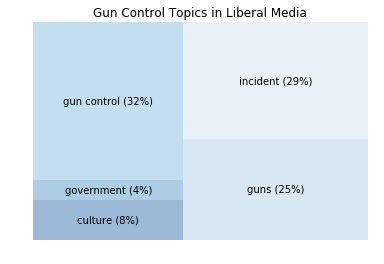

In [66]:
maketrees("Liberal",g_lx, liberalcolors)

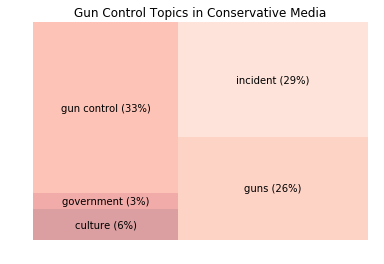

In [67]:
consTree = maketrees("Conservative", g_cx, conservcolors)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


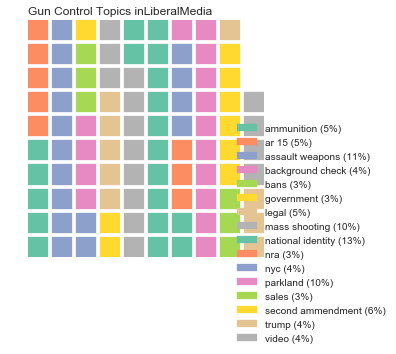

In [171]:
#plot the breakdown of topics in liberal outlets
makewaffles(s_lx, "Liberal", "libtopics")

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


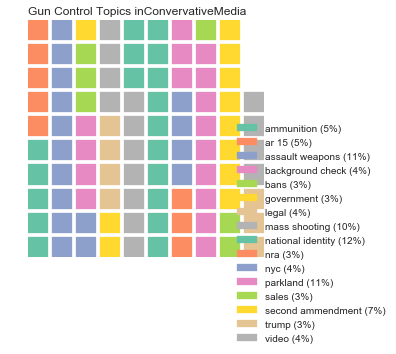

In [172]:
#plot the breakdown of topics in conservative outlets
makewaffles(s_cx, "Convervative", "constopics")

In [173]:
#What are the incident topics?
inlabel=df[df['general']=='incident']['specific']

In [174]:
incidentlx={}
for k,v in zip(inlabel, df['lib']):
    v=int((v*100)/ltot)
    incidentlx[k]=v
    
incidentcx={}
for k,v in zip(inlabel, df['consv']):
    v=int((v*100)/ltot)
    incidentcx[k]=v